In [5]:
import qiskit
from qiskit import *

### Circuito para medidas não-reveladas fracas

Dado o estado quântico bipartido inicial
\begin{equation}
|\Psi \rangle_{AB} = |\psi\rangle_A \otimes |\phi\rangle_B =  |\psi\rangle_A \otimes \Big(\cos\frac{\theta}{2} |0 \rangle_B + \sin \frac{\theta}{2} |1 \rangle_B\Big), 
\end{equation}
onde $|\phi\rangle_B$ pode ser obtido a partir de $|\phi\rangle_B = U(\theta) |0 \rangle_B$

Aplicando a porta $C_{not} (A \to B) := C(A \to B) = |0 \rangle \langle 0| \otimes I_{2 \times 2} + |1 \rangle \langle 1| \otimes \sigma_X$, temos o seguinte estado
\begin{equation}
C(A \to B)|\Psi \rangle_{AB} = \langle 0| \psi \rangle \Big( \cos\frac{\theta}{2} |0,0\rangle + \sin\frac{\theta}{2} |0,1\rangle \Big) + \langle 1| \psi \rangle \Big( \cos\frac{\theta}{2} |1,1\rangle + \sin\frac{\theta}{2} |1,0\rangle \Big). 
\end{equation}
Tomando o traço parcial sobre sistema $B$, temos
\begin{align}
Tr_B\Big(C(A \to B)|\Psi \rangle_{AB} \langle \Psi | C^{\dagger}(A \to B) \Big) & = |{ \langle 0| \psi \rangle}|^2 |0 \rangle \langle 0| + |{ \langle 1| \psi \rangle}|^2 |1 \rangle \langle 1| + \cos\frac{\theta}{2}\sin\frac{\theta}{2}\langle 0| \psi \rangle \langle \psi| 1 \rangle |0 \rangle \langle 1| + t.c.,
\end{align}
mas notando que
\begin{align}
\langle 0| \psi \rangle \langle \psi| 1 \rangle |0 \rangle \langle 1| = |0 \rangle \langle 0| \psi \rangle \langle \psi| 1 \rangle \langle 1| = |0 \rangle \langle 0| \psi \rangle \langle \psi| \Big( I_{2 \times 2} - |0 \rangle \langle 0| \Big),
\end{align}
e similarmente para o transposto conjugado, obtemos
\begin{align}
Tr_B\Big(C(A \to B)|\Psi \rangle_{AB} \langle \Psi | C^{\dagger}(A \to B) \Big) & = (1 - \cos\frac{\theta}{2}\sin\frac{\theta}{2}) \Phi_{X}(| \psi \rangle \langle \psi|) + \cos\frac{\theta}{2}\sin\frac{\theta}{2} | \psi \rangle \langle \psi|,
\end{align}
onde $ \Phi_{X}(| \psi \rangle \langle \psi|) = \Pi_0(\psi \rangle \langle \psi| ) + \Pi_1(\psi \rangle \langle \psi| )$  e $\epsilon := \cos\frac{\theta}{2}\sin\frac{\theta}{2} = \frac{1}{2}\sin \theta \in [0,1/2]$. Logo, temos que
\begin{align}
\Phi^{\epsilon}_X(| \psi \rangle \langle \psi|) = \epsilon | \psi \rangle \langle \psi| + (1 - \epsilon)\Phi_{X}(| \psi \rangle \langle \psi|) = Tr_B\Big(C(A \to B)|\Psi \rangle_{AB} \langle \Psi | C^{\dagger}(A \to B) \Big),
\end{align}
onde o observável $X$ é referente a base de autoestados $|0\rangle, |1\rangle$.

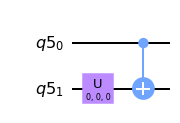

In [14]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)

qc.u(0, 0, 0, qr[1]) #valores aleatórios
qc.cx(qr[0],qr[1])

qc.draw(output = 'mpl')


Agora, consideremos uma base numa direção arbitrária dada por
\begin{align}
& |n_0 \rangle = \cos\frac{\theta}{2} |0 \rangle + e^{i \phi} \sin \frac{\theta}{2} |1 \rangle = U(\theta, \phi, 0) |0 \rangle \\
& |n_1 \rangle = -\sin\frac{\theta}{2} |0 \rangle + e^{-i \phi} \cos \frac{\theta}{2} |1 \rangle = U(\theta, \phi, 0) |1 \rangle,
\end{align}
de modo que
\begin{align}
(U \otimes I_B) C(A \to B) (U^{\dagger} \otimes I_B) |\Psi\rangle = \langle n_0| \psi \rangle \Big( \cos\frac{\theta}{2} |n_0,0\rangle + \sin\frac{\theta}{2} |n_0,1\rangle \Big) + \langle n_1| \psi \rangle \Big( \cos\frac{\theta}{2} |n_1,1\rangle + \sin\frac{\theta}{2} |n_1,0\rangle \Big), 
\end{align}
bastando realizar a mesma manipulação que anteriormente. Logo, temos que medidas não reveladas do observável $Y$ referente à base de autovetores $|n_0 \rangle , |n_1 \rangle$ são implementadas através de
\begin{align}
\Phi^{\epsilon}_Y(\rho_A) = Tr_B \Big(UC(A\to B)U^{\dagger}|\Psi \rangle_{AB} \langle \Psi |  U C^{\dagger}(A\to B)U\Big), 
\end{align}

com $\epsilon = \frac{1}{2} \sin \theta$.

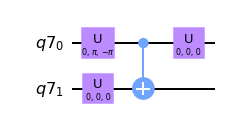

In [16]:
import numpy as np
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)

qc.u(0, np.pi, -np.pi, qr[0]) #inversa de U
qc.u(0, 0, 0, qr[1]) #valores aleatórios
qc.cx(qr[0],qr[1])
qc.u(0, 0, 0, qr[0]) #valores aleatórios


qc.draw(output = 'mpl')

### Estendendo $\epsilon \to [0,1]$ 

Ao invés de considerarmos a $C_{not}(A \to B)$, consideremos (como em Information-reality complementarity in photonic weak measurements, Phys. Rev. A 97, 062108 (2018))
\begin{equation}
C_Z (A \to B) = |0 \rangle \langle 0| \otimes I_{2 \times 2} + |1 \rangle \langle 1| \otimes \sigma_Z,
\end{equation}
de modo que
\begin{align}
Tr_B\Big(C_Z(A \to B)|\Psi \rangle_{AB} \langle \Psi | C_Z^{\dagger}(A \to B) \Big) & = \Big(1 - (\cos^2\frac{\theta}{2} - \sin^2\frac{\theta}{2})\Big) \Phi_{X}(| \psi \rangle \langle \psi|) + (\cos^2\frac{\theta}{2} - \sin^2\frac{\theta}{2})| \psi \rangle \langle \psi|,
\end{align}
definindo 
\begin{align}
\epsilon := \cos^2\frac{\theta}{2} - \sin^2\frac{\theta}{2} = \cos \theta,
\end{align}
temos que $\epsilon \in [0,1]$.